# Código simplificado para video de divulgación usando sympy, manim y matplotlib 

## Colección de  Librerias usadas

In [2]:
import pandas as pd
import mpmath

import numpy as np
from scipy.fft import fft, ifft
from latex2sympy2 import latex2sympy, latex2latex
from manim import *
import calendar
import random
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import image
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation, FFMpegWriter
from manim_voiceover import VoiceoverScene
from manim_voiceover.services.recorder import RecorderService
from manim_voiceover.services.gtts import GTTSService
import warnings
warnings.filterwarnings("ignore")
config.media_width = "100%"
config.verbosity = "WARNING"
import compass_functions as cf
import sympy
from sympy import symbols, Eq, latex, sqrt,solve ,Function 
from sympy import   I, simplify, expand , print_latex,init_printing
from sympy import Symbol, sin,cos,arg,exp ,integrate,Derivative,Integral  
from sympy.utilities.lambdify import lambdify
sympy.init_printing()
from IPython.display import Markdown as md
#DSP con soundcard 
import sounddevice as sd
# Ajustes del fondo de plot para matplotlib 
plt.rcParams.update({
        "lines.color": "black",
        "patch.edgecolor": "black",
        "text.color": "white",
        "axes.facecolor": "black",
        "axes.edgecolor": "black",
        "axes.labelcolor": "black",
        "xtick.color": "black",
        "ytick.color": "black",
        "grid.color": "gray",
        "figure.facecolor": "black",
        "figure.edgecolor": "black",
        "savefig.facecolor": "black",
        "savefig.edgecolor": "black"})

# Alfabeto griego para sympy 
alpha, beta, gamma, delta = symbols('alpha, beta, gamma, delta')
epsilon, zeta, eta, theta = symbols('epsilon, zeta, eta, theta')
iota, kappa, lamda, mu = symbols('iota, kappa, lamda, mu')
nu, xi, omicron, pi = symbols('nu, xi, omicron, pi')
rho, sigma, tau, upsilon = symbols('rho, sigma, tau, upsilon')
phi, chi, psi, omega = symbols('phi, chi, psi, omega')

Alpha, Beta, Gamma, Delta = symbols('Alpha, Beta, Gamma, Delta')
Epsilon, Zeta, Eta, Theta = symbols('Epsilon, Zeta, Eta, Theta')
Iota, Kappa, Lamda, Mu = symbols('Iota, Kappa, Lamda, Mu')
Nu, Xi, Omicron, Pi = symbols('Nu, Xi, Omicron, Pi')
Rho, Sigma, Tau, Upsilon = symbols('Rho, Sigma, Tau, Upsilon')
Phi, Chi, Psi, Omega = symbols('Phi, Chi, Psi, Omega')

Manim Community v0.17.3

In [30]:
mpmath.mp.list_primes(13*3)

#### Herramientas para intentar escuchar lo que vemos

In [43]:


# t = np.arange(0,2,1/44100)
# sd.play(np.sin(2*np.pi*440*t), 44100)

In [21]:
Upsilon

## Ejemplos de uso de sympy y expresiones en LaTex y numpy equivalentes 

Para que el presente documento sea de utilidad, crearé las expresiones simbólicas en sympy y sus equivalentes  apropiadas tanto para numpy matplotlib y manim . 


* Cuando uso sin cos exp etc el código crea variables en sympy , si uso otras librerías como numpy las llamo de la forma típica  np.exp

### Creo una función simbólica. Opero, resuelvo ecuaciones y simplifico.Obtengo expresiones equivalente en numpy para plots y salidas en LaTeX para ecuaciones matemáticas 

#### Creo un conjunto de expresiones simbólicas con sympy y tomo su expresión en LaTex

In [8]:
i=I # constante imaginaria sqrt(-1)
t = Symbol('t',real=True)
Theta_t= sympy.Equality(Theta**t,exp(i*t)) 
Theta=Symbol('Theta',complex='True')




In [9]:
expand(Theta_t.rhs,complex=True)

In [485]:
print(latex(Theta_t))
latex(Theta_t)


\Theta^{t} = e^{i t}


'\\Theta^{t} = e^{i t}'

In [203]:
Theta_t_Tex="\Theta^{t} = e^{i t}"

In [486]:
print(Theta_t)

Eq(Theta**t, exp(I*t))


#### Tomo una expresión en LaTeX y la convierto en una expresión en sympy

A veces pasa que necesitamos tomar una expresión larga que tenemos en LaTex e
implementarla con sympy .


In [ ]:
tex = r"\frac{d}{dt}e^{i \omega t}"

expr_sympy=latex2sympy(tex)
print(expr_sympy)
expr_sympy

Derivative(exp(i*omega*t), t)


#### Resolver ecuaciones  dadas en forma simbólica 

In [487]:
eq_phi=Eq(t**2 -t-1,0)
eq_phi_cplx=Eq(t**2 -t+1,0)

eq_phi

In [488]:
print_latex(eq_phi)

t^{2} - t - 1 = 0


In [489]:
solve(eq_phi)

In [490]:
solve(eq_phi_cplx)

In [491]:
print_latex(solve(eq_phi_cplx))

\left[ \frac{1}{2} - \frac{\sqrt{3} i}{2}, \  \frac{1}{2} + \frac{\sqrt{3} i}{2}\right]


Tomando la salida de sympy y usando LaTex en la celda de markdown 

$$\Theta^{t} = e^{i t}$$

$$\left[ \frac{1}{2} - \frac{\sqrt{3} i}{2}, \  \frac{1}{2} + \frac{\sqrt{3} i}{2}\right]$$

#### Lambdify : obtenemos la versión discreta de las expresiones simbólicas 

In [6]:
def get_npf(variable,expresion):
    # get_NumPi_Function ---> obtengo la función para numpy
    npf=lambdify(variable,expresion , modules=['numpy'])
    return npf

In [7]:
def get_tex_and_npf(expresion,variable,values=np.linspace(0,2*np.pi , 360)):
    # Obtengo la función numpy, el texto para TeX y una secuencia
    # basada en la función en numpy en el rango de valores dado por "values".
    # La "expresión"  "variable" debe definirse con sympy fuera de la función 
    # Si "values" no se especifica para el array de salida
    # se toma de 0 a 2pi con 360 pasos discretos
    tex=latex(expresion)
    numpy_function=get_npf(variable,expresion)
    numpy_array=numpy_function(values)
    return tex,numpy_function,numpy_array  


### Elipse básica

Text(0, 0, '$ 2 e^{i t} + e^{- i t}$')

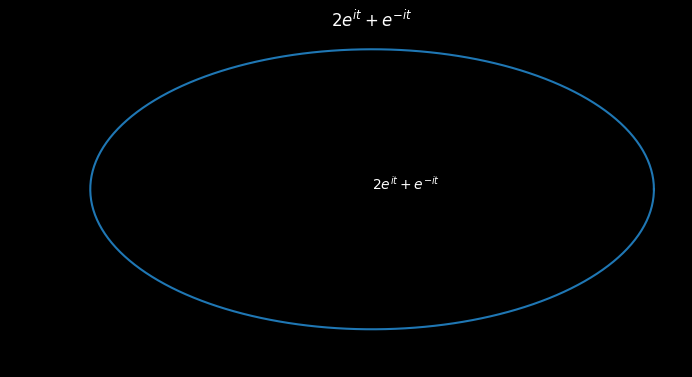

In [19]:
t=Symbol('t',real=True)
i=sympy.I
expr=2*exp(i*t)+exp(-i*t)
#expr=expr.expand(complex=True)
expr_tex,expr_npf,expr_npa = get_tex_and_npf(expr,t)

plt.figure(figsize=(8,4))
plt.title(f"$ {expr_tex}$")
plt.plot(expr_npa.real,expr_npa.imag)
plt.text(0,0,f"$ {expr_tex}$")

In [13]:
t=Symbol('t',real=True)
t_values = np.linspace(0,2*np.pi , 360)
elipse_2_1=exp(i*t)+sympy.Rational(1,2)*exp(-i*t)

elipse_2_1_tex,elipse_2_1_npf,elipse_2_1_npa = get_tex_and_npf(elipse_2_1,t,t_values)


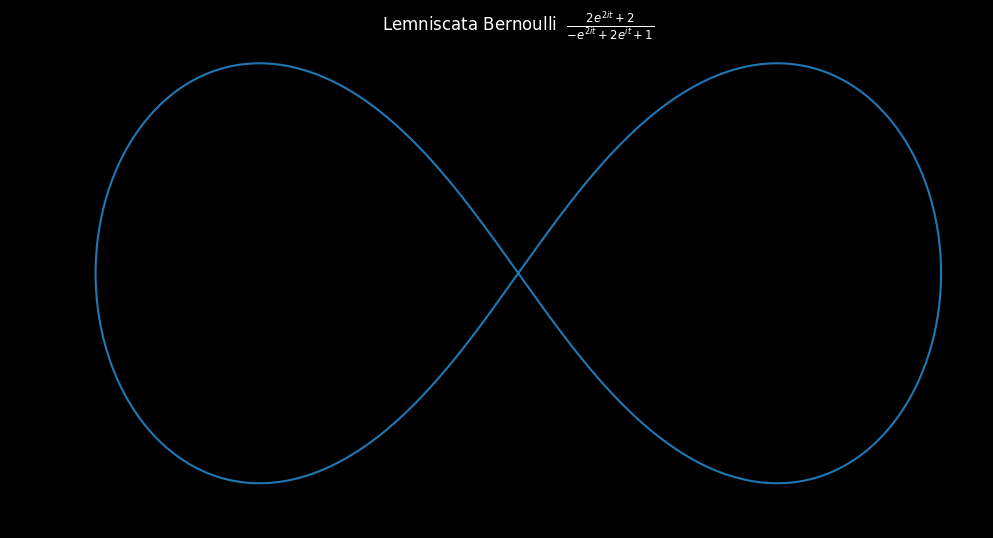

In [14]:
z_loco = (2 / (1 + ((exp(I * t) - exp(-I * t)) / (2 * I))**2)) * ((exp(I * t) + exp(-I * t)) / 2) + I * ((2 * ((exp(I * t) + exp(-I * t)) / 2)) / (1 + ((exp(I * t) - exp(-I * t)) / (2 * I))**2)) * ((exp(I * t) - exp(-I * t)) / (2 * I))

z_loco_tex,z_loco_npf,z_loco_npa = get_tex_and_npf(z_loco,t,t_values)
z_expandido=latex(z_loco.expand(complex=True))
z_simplificado=latex(z_loco.simplify(complex=True))
plt.figure(figsize=(12,6))
plt.title(f"Lemniscata Bernoulli  $ {z_simplificado}$")
plt.plot(z_loco_npa.real,z_loco_npa.imag)

In [18]:
%%manim -qh Lemniscata
t=np.linspace(0,2*np.pi,120)
omega_x=1
omega_y=2
a=2
b=1

theta_xp=(a/2)*np.exp(1j*omega_x*t)
theta_yp=(b/2)*np.exp(1j*omega_y*t)
theta_xn=(a/2)*np.exp(-1j*omega_x*t)
theta_yn=(-b/2)*np.exp(-1j*omega_y*t)
lemniscata=theta_xp+theta_xn+theta_yp+theta_yn

leminscata_pure=a*np.cos(t)/(1+(np.sin(t))**2)+1j*a*np.cos(t)*np.sin(t)/(1+(np.sin(t))**2)
complex_arrays=[theta_xp,theta_yp,theta_xn,theta_yn,lemniscata,leminscata_pure]
run_time=10        # Tiempo total de la animacion

angles = np.angle(-theta_xp)
normalized_angles = (angles - np.min(angles)) / (np.max(angles) - np.min(angles))

class Lemniscata(Scene):
    def construct(self):
      
        theta_text = MathTex(r"\tau")
        self.play(Write(theta_text))

        # dot_f1 = Dot(point=(f1.real, f1.imag, 0),color=WHITE)
        # dot_f2 = Dot(point=(f2.real, f2.imag, 0),color=WHITE)        
        #self.add(dot_f1,dot_f2)

        dots_groups = []
        for complex_array in complex_arrays:
            dots_group = self.plot_complex_points(complex_array)
            dots_groups.append(dots_group)

        self.play(*[Write(dots_group, run_time=run_time,lag_ratio=10) for dots_group in dots_groups])

        self.wait(6)
    


    def plot_complex_points(self, complex_array):
        dots = VGroup()
        
        colormap = plt.get_cmap("hsv")
        for complex_point, angle in zip(complex_array, normalized_angles):
            rgb_color = colormap(angle)[:3]  # Extract RGB values
            hex_color = "#" + "".join([f"{int(c * 255):02x}" for c in rgb_color])
            dot = Dot(complex_to_R3(complex_point), color=hex_color,fill_opacity=0.3)
            dots.add(dot)

        return dots



     

### Separar parte real y parte imaginaria en sympy

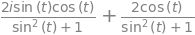

In [15]:
z_loco.expand(complex=True)

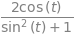

In [16]:
z_loco.expand(complex=True).as_real_imag()[0]

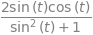

In [17]:
z_loco.expand(complex=True).as_real_imag()[1]

### Plot de una función creada a partir de sympy en variable simbólica 

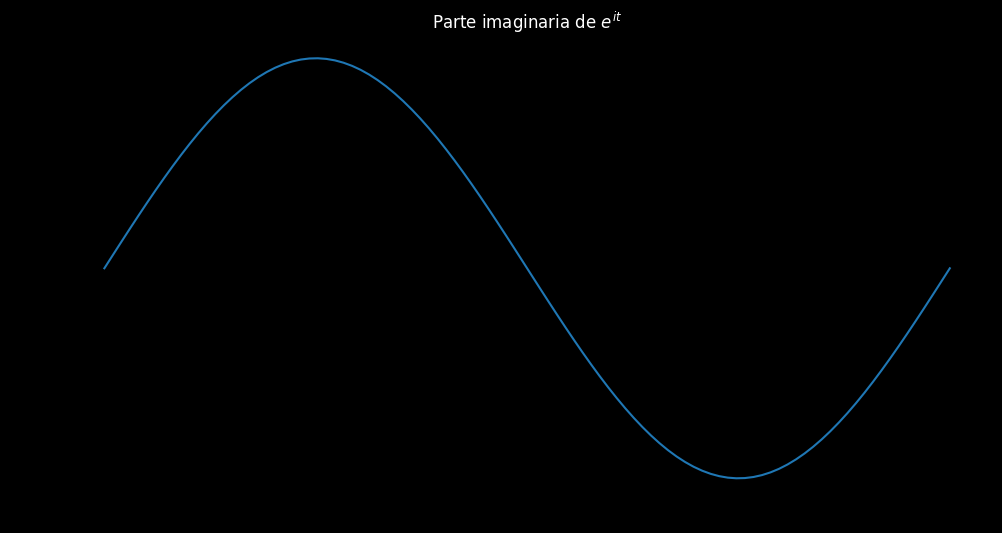

In [286]:
cplx_exp = exp(i*t) 
cplx_exp_tex=latex(cplx_exp)
cplx_exp_d =lambdify(t,cplx_exp , modules=['numpy'])

N=100
t_min=0
t_max=2*np.pi
t_values = np.linspace(t_min,t_max , N)

plt.figure(figsize=(12,6))

Title=f"""Parte imaginaria de ${cplx_exp_tex}$ """

plt.title(Title)
plt.plot(t_values,cplx_exp_d(t_values).imag)

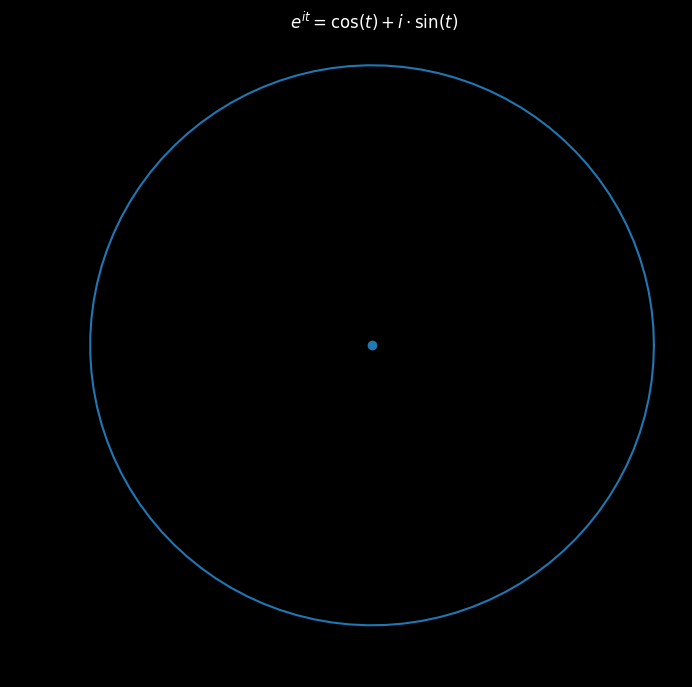

In [380]:
plt.figure(figsize=(8,8))

Title=f""" ${cplx_exp_tex}=\cos(t)+i\cdot \sin(t)$ """

plt.title(Title)
plt.scatter(0,0)
plt.plot(cplx_exp_d(t_values).real,cplx_exp_d(t_values).imag)

#### Simplificando expresiones 

In [29]:
# Defino "t" y "a"
t, a ,b = symbols('t a b')

# Defino z en función de t y a
z_loco = (a / (1 + ((exp(I * t) - exp(-I * t)) / (2 * I))**2)) * ((exp(I * t) + exp(-I * t)) / 2) + I * ((a * ((exp(I * t) + exp(-I * t)) / 2)) / (1 + ((exp(I * t) - exp(-I * t)) / (2 * I))**2)) * ((exp(I * t) - exp(-I * t)) / (2 * I))

# Simplifico la expresión 
simplified_z = simplify(z_loco)


print("Expresión para  z(t):")
print_latex(simplified_z)


Expresión para  z(t):
\frac{a \left(e^{2 i t} + 1\right)}{- e^{2 i t} + 2 e^{i t} + 1}


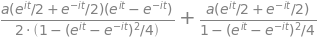

In [120]:
# Imprimo dentro de Jupyter la expresión
z_loco

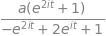

In [30]:
simplified_z

### Prueba de expresiones simbólicas en  Manim 

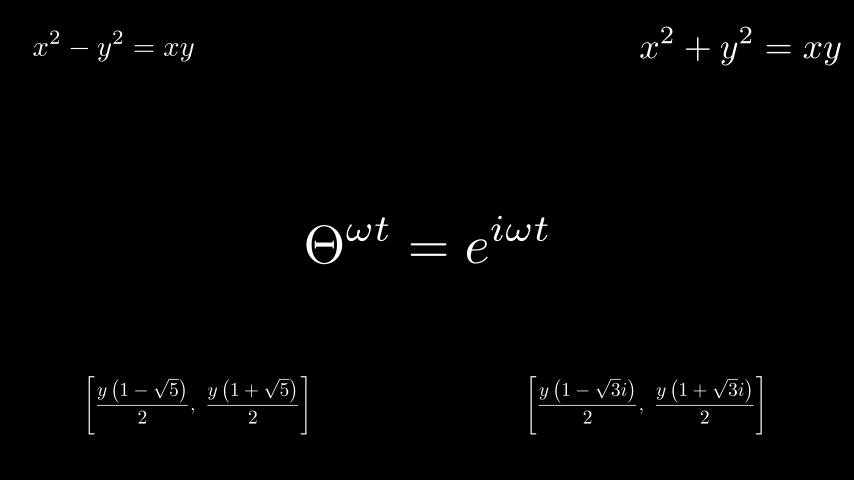

In [23]:
%%manim -ql MostrarTex
x=Symbol('x',complex='True')
y=Symbol('y',complex='True')
Theta_omega_t= sympy.Equality(Theta**(omega*t),exp(i*omega*t))
Theta_t= sympy.Equality(Theta**t,exp(i*t))
phi_relation=Eq(x**2-y**2,x*y)
cplx_phi_relation=Eq(x**2+y**2,x*y)

TexCenter=MathTex(latex(Theta_omega_t))
TexUL=MathTex(latex(phi_relation)).to_edge(UL).scale(0.8)
TexUR=MathTex(latex(cplx_phi_relation)).to_edge(UR)
TexDL=MathTex(latex(solve(phi_relation,x))).to_corner(DL)
TexDR=MathTex(latex(solve(cplx_phi_relation,x))).to_corner(DR)
Center_scale=1.8
UL_scale=1.2
UR_scale=1.2
DL_scale=0.65
DR_scale=0.65

class MostrarTex(Scene):
    def construct(self):      
      
        
        self.add(TexCenter.scale(Center_scale))
        self.add(TexUL.scale(UL_scale))
        self.add(TexUR.scale(UR_scale))       
        self.add(TexDL.scale(DL_scale))
        self.add(TexDR.scale(DR_scale))

In [ ]:
%%manim -ql ShowTex
x=Symbol('x',complex='True')
y=Symbol('y',complex='True')
Theta_omega_t= sympy.Equality(Theta**(omega*t),exp(i*omega*t))
Theta_t= sympy.Equality(Theta**t,exp(i*t))
phi_relation=Eq(x**2-y**2,x*y)
cplx_phi_relation=Eq(x**2+y**2,x*y)

TexCenter=MathTex(latex(Theta_omega_t))
TexUL=MathTex(latex(phi_relation)).to_edge(UL).scale(0.8)
TexUR=MathTex(latex(cplx_phi_relation)).to_edge(UR)
TexDL=MathTex(latex(solve(phi_relation,x))).to_corner(DL)
TexDR=MathTex(latex(solve(cplx_phi_relation,x))).to_corner(DR)
Center_scale=1.8
UL_scale=1.2
UR_scale=1.2
DL_scale=0.65
DR_scale=0.65

class ShowTex(Scene):
    def construct(self):      
      
        
        self.add(TexCenter.scale(Center_scale))
        self.add(TexUL.scale(UL_scale))
        self.add(TexUR.scale(UR_scale))       
        self.add(TexDL.scale(DL_scale))
        self.add(TexDR.scale(DR_scale))

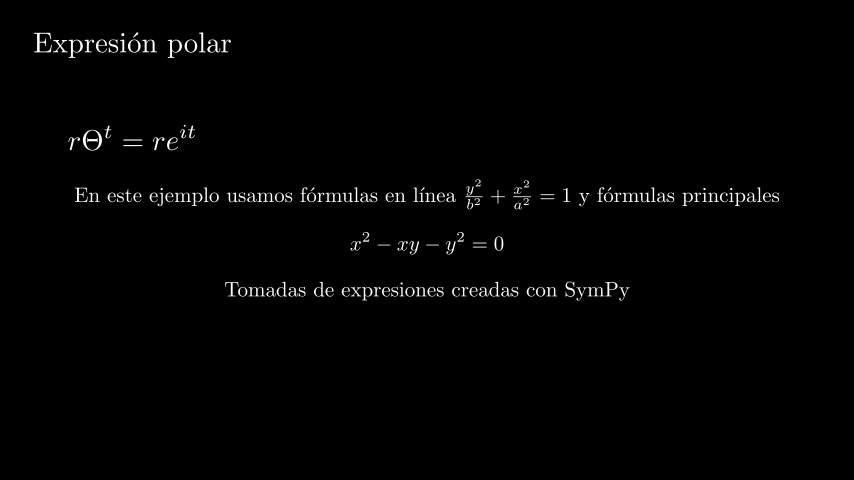

In [548]:
%%manim -ql ShowTex2
x=Symbol('x',complex='True')
y=Symbol('y',complex='True')
a=Symbol('a',complex='True')
b=Symbol('b',complex='True')
Theta_omega_t= sympy.Equality(Theta**(omega*t),exp(i*omega*t))
Theta_t= sympy.Equality(Theta**t,exp(i*t))

r =Symbol('r')
#r =Symbol('r', nonnegative=True)
expr = Eq((x/a)**2+(y/b)**2,1).simplify()
expr_polar=expr.subs({x: a*cos(theta), y: b*sin(theta)}).simplify()
phi_relation=Eq(x**2-x*y-y**2,0)
cplx_phi_relation=Eq(x**2-x*y+y**2,0)

TexCenter_=r""" 

En este ejemplo usamos fórmulas en línea ${expr}$ y fórmulas principales 
$${phi_relation}$$ 

Tomadas de expresiones creadas con SymPy


"""



TexCenter_=TexCenter_.format(expr=latex(expr),phi_relation=latex(phi_relation))

TexUL_=r""" Expresión polar 


$$r{Theta_t_lhs}=r{Theta_t_rhs}$$



"""
TexUL_=TexUL_.format(Theta_t_lhs=latex(Theta_t.lhs),Theta_t_rhs=latex(Theta_t.rhs))

TexUR_=latex(expr_polar)
TexDL_=latex(expr_polar)
TexDR_=latex(expr_polar)



TexCenter=Tex(TexCenter_)
TexUL=Tex(TexUL_).to_edge(UL).scale(0.8)
TexUR=Tex(TexUR_).to_edge(UR)
TexDL=Tex(TexDL_).to_corner(DL)
TexDR=Tex(TexDR_).to_corner(DR)
Center_scale=0.7
UL_scale=1.2
UR_scale=1.2
DL_scale=0.65
DR_scale=0.65

class ShowTex2(Scene):
    def construct(self):      
      
        
        self.add(TexCenter.scale(Center_scale))
        #self.add(TexUL.scale(UL_scale))
        # self.add(TexUR.scale(UR_scale))       
        # self.add(TexDL.scale(DL_scale))
        # self.add(TexDR.scale(DR_scale))

#### Lo mismo en vídeo en manim 

## Creación de expresiones matemáticas usadas en  planeta Tau en Sympy + LaTeX + Numpy

In [194]:
%%manim -ql ShowTex2
x=Symbol('x',complex='True')
y=Symbol('y',complex='True')
a=Symbol('a',complex='True')
b=Symbol('b',complex='True')
Theta_omega_t= sympy.Equality(Theta**(omega*t),exp(i*omega*t))
Theta_t= sympy.Equality(Theta**t,exp(i*t))

r =Symbol('r')
#r =Symbol('r', nonnegative=True)
expr = Eq((x/a)**2+(y/b)**2,1).simplify()
expr_polar=expr.subs({x: a*cos(theta), y: b*sin(theta)}).simplify()
phi_relation=Eq(x**2-x*y-y**2,0)
cplx_phi_relation=Eq(x**2-x*y+y**2,0)

TexCenter_=r""" 

En este ejemplo usamos fórmulas en línea ${expr}$ y fórmulas principales 
$${phi_relation}$$ 

Tomadas de expresiones creadas con SymPy


"""



TexCenter_=TexCenter_.format(expr=latex(expr),phi_relation=latex(phi_relation))

TexUL_=r""" Expresión polar 


$$r{Theta_t_lhs}=r{Theta_t_rhs}$$



"""
TexUL_=TexUL_.format(Theta_t_lhs=latex(Theta_t.lhs),Theta_t_rhs=latex(Theta_t.rhs))

TexUR_=latex(expr_polar)
TexDL_=latex(expr_polar)
TexDR_=latex(expr_polar)



TexCenter=Tex(TexCenter_)
TexUL=Tex(TexUL_).to_edge(UL).scale(0.8)
TexUR=Tex(TexUR_).to_edge(UR)
TexDL=Tex(TexDL_).to_corner(DL)
TexDR=Tex(TexDR_).to_corner(DR)
Center_scale=0.7
UL_scale=1.2
UR_scale=1.2
DL_scale=0.65
DR_scale=0.65

class ShowTex2(Scene):
    def construct(self):      
      
        
        self.add(TexCenter.scale(Center_scale))
        self.add(TexUL.scale(UL_scale))
        # self.add(TexUR.scale(UR_scale))       
        # self.add(TexDL.scale(DL_scale))
        # self.add(TexDR.scale(DR_scale))
Theta_x = Function('Theta_x')
Theta_y = Function('Theta_y')
Eq_Theta_rect=sympy.Eq(Theta**t,Theta_x(t) + I*Theta_y(t))
Theta_rect=sympy.Equality(Theta**t,Theta_x(t) + I*Theta_y(t))

Theta_rect

In [340]:
Theta_rect.lhs - Theta_rect.rhs

In [124]:
Theta**t



In [126]:
z = sympy.Symbol('z')
T_o = sympy.Symbol('T_o')
zeta = sympy.exp(1j*2*pi/T_o)
eq_z=sympy.Eq((z-zeta**0)*(z-zeta**1)*(z-zeta**2)*(z-zeta**3)*(z-zeta**4)*(z-zeta**5),0)
sympy.solve(eq_z,z)
expreso = (z-zeta**0)*(z-zeta**1)*(z-zeta**2)*(z-zeta**3)*(z-zeta**4)*(z-zeta**5)
zz=sympy.expand(expreso)
zzz = sympy.collect(zz,z)

zzz.evalf(subs={T_o:6})

zeta = sympy.Symbol('zeta',complex=True)

# Atlas del tiempo y Números Compás

## Primera Escena Matemáticas en el planeta Tau
Ésta es una historia de ficción con fines de ilustrar temas matemáticos.

Imagina una galaxia  en un universo matemático de juguete en la que uno de sus planetas se llama Tau. 
$$ $$
A diferencia de en la Tierra, en Tau personajes históricos equivalentes a Ptolomeo, 
Fourier y Lissajous fueron contemporáneos y se hicieron amigos mientras compartían 
sus descubrimientos. 

A lo que nosotros llamamos Números Complejos $\mathbb{C}$, típicamente expresados en forma rectangular o polar de la siguiente manera:

$$z=a+ib=re^{i\theta} \space  $$ 

En Tau éstos números bidimensionales eran llamados Números Compás, por su relación con las  circunferencias y los vectores que fácilmente pueden representar.

-------------------------------------------------

Notar que en inglés Compass también significa brújula y en castellano 
también significa ritmo . Intentaremos ilustrar cómo éstas ideas están conectadas. 

$$ $$

Los habitantes de Tau vivían en armonía con la naturaleza y 
las matemáticas eran parte fundamental de la cultura del planeta. 

Se enseñaban las ideas profundamente, con pasión y arte, tanto para aplicarlas a la creación de tecnologías que avanzan la sociedad,como también para describir el universo y transmitir de generación en generación los conocimientos e intuiciones fundamentales. 




Formalidades :
$$  $$ 
En el plano complejo, una circunferencia con centro $c=c_x+ic_y$ y radio $r$ a partir de la ecuación de la circunferencia $$|z-c| = r$$ se obtiene la forma paramétrica. 

$e^z$ es una función analítica, usada para describir regiones circulares en plano complejo como arcos de circunferencias alrededor de un punto, por tanto, frecuente en diversa bibliografía de análisis.

$$z = re^{i\theta}+C $$ 

$$z = r(\cos \theta + i \sin \theta)+c_x+ic_y$$

$$\theta \in [0,2\pi)$$


### Variables para guardar el texto anterior

In [339]:
atlas_titulo_subrayado="Atlas del tiempo y Números Compás"
matematicas_planeta_tau="Matemáticas en planeta Tau"
texto_intro_tau=r""" 
Ésta es una historia de ficción con fines de ilustrar temas matemáticos.

Imagina una galaxia  en un universo matemático de juguete que iremos creando, en la que uno de sus planetas se llama Tau. 
$$ $$
A diferencia de en la Tierra, en Tau personajes históricos equivalentes a Ptolomeo, 
Fourier y Lissajous fueron contemporáneos y se hicieron amigos mientras compartían 
sus descubrimientos. 

A lo que nosotros llamamos Números Complejos $\mathbb{C}$, típicamente expresados :

$$z=a+ib=re^{i\theta}$$ 

En Tau éstos números bidimensionales eran llamados Números Compás, por su relación con las  circunferencias y los vectores que fácilmente pueden representar.



"""


texto_intro_tau_2 =r""" 
Notar que en inglés Compass también significa brújula y en castellano también significa ritmo 

$$ $$


Los habitantes de Tau vivían en armonía con la naturaleza y las matemáticas eran parte fundamental de la cultura del planeta. 

Se enseñaban las ideas profundamente, con pasión y arte, tanto para aplicarlas a la creación de tecnologías que avanzan la sociedad,como también para describir el universo  y transmitir de generación en generación los conocimientos e intuiciones fundamentales. 

$$ $$ 

En la descripción del video habrá enlaces a información complementaria, para distintos niveles de familiaridad con los temas tratados. 

"""


In [361]:
texto_wikipedia_complejos=r"""  
Formalidades como se suelen presentar en la tierra  :

Si en el plano complejo tenemos una circunferencia con centro $c=c_x+ic_y$ y radio $r$, a  partir de la ecuación de la circunferencia $|z-c| = r$ podemos obtener la forma paramétrica. 

$$z = re^{it}+C $$ 

$$z = (r\cos t +c_x)  + i(r \sin t+c_y)$$



$$t \in [0,2\pi)$$




"""

# Texto y Fórmulas a presentar con el plot

texto_implicita = r""" 

¿Recuerdas la siguiente ecuación implícita?

$$\\left(\\frac{x}{a}\\right)^2+\\left(\\frac{y}{b}\\right)^2=1$$ 

Siendo $a$ y $b$ los valores de los semiejes mayor y menor respectivamente. 

$$F_1=\sqrt{a^2-b^2}$$

$$F_2=-F_1$$

Siendo $F_1$ y $F_2$ las distancias focales de la elipse. 



"""

voice_conicas="""
Si te enseñaron sobre las  cónicas  probablemente recuerdes 

La  ecuación implícita para un elipse usando números reales

Ésta forma de ver la elipse no está incluida en el artículo de Wikipedia así que creo es 
interesante empezar por aquí
"""

ElipseOndasTex=r"""

Consideremos inicialmente una elipse centrada en el origen $z_o=0$ 
Podemos ver como  está formada por la composición  de dos acciones 
de rotación inversas o de dos ondas fundamentales.

$z_o , R_{_+} , R_{_-} \in \mathbb{C}$  

$t \in \mathbb{R}$    

$k \in \mathbb{Z}$


$$z(t)=z_o+ R_{_+} e^{it} +R_{_-} e^{-it}$$ 
$$z(t)=R_{_+} e^{it} +R_{_-} e^{-it}$$
$$|R_{_+}|>|R_{_-}|$$  

$$a=R_{_+}+R_{_-}$$ 
$$b=R_{_+}-R_{_-}$$
$$z(t)=a\cos{t}+i b \sin{t}$$ 
$$F_{_{\pm}}=\pm 2\sqrt{R_{_+}R_{_-}}=2 e^{i\pi k} \sqrt{R_{_+}R_{_-}}$$

"""

FormulasElipseUL=r"""  


$$ R_{_+} , R_{_-} \in \mathbb{C}$$  

$$z(t)=R_{_+} e^{it} +R_{_-} e^{-it}$$ 

$$z(t)=R_{_+} e^{it} +R_{_-} e^{-it}$$ 

En este ejemplo tenemos 

$$|R_{_+}|>|R_{_-}|$$ 

Y las posiciones de los focos en el plano complejo se pueden expresar como:

$$F_{_{\pm}}=\pm 2\sqrt{R_{_+}R_{_-}}$$

"""

FormulasElipseUR=r"""  

Recordando que el coseno es el promedio de dos acciones fundamentales :

$$a \cos(t)=a\frac{e^{it}+e^{-it}}{2}$$


Y que el seno es un desplazamiento del anterior promedio 

$$b \sin(t)=b\frac{e^{it}-e^{-it}}{2i}$$


Es fácil ver que podemos expresar la curva  de forma paramétrica:

$$z(t)=a\cos{t}+i b \sin{t}$$ 

Con 

$$a=R_{_+}+R_{_-}$$ 
$$b=R_{_+}-R_{_-}$$




"""

#### Comprobando las dimensiones del texto en manim

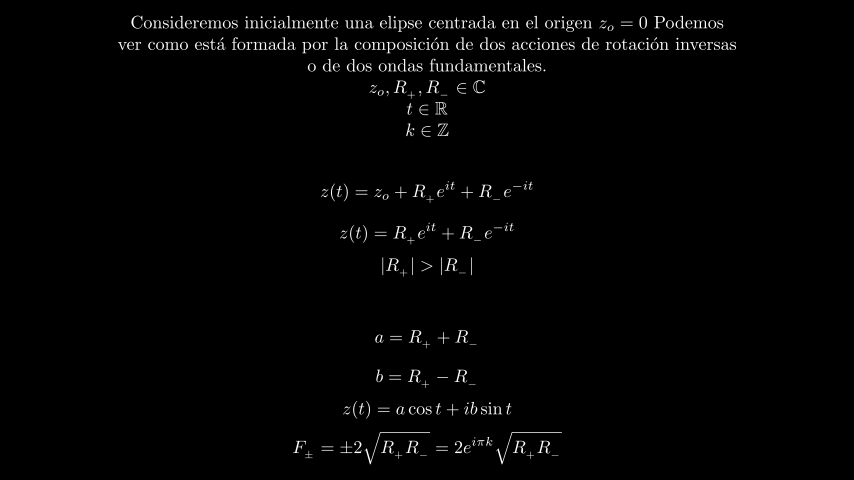

In [362]:
%%manim -ql VerTexto
tex_a_ver=ElipseOndasTex
escala=0.6
class VerTexto(Scene):
    def construct(self):
        tex_obj=Tex(tex_a_ver).scale(escala).arrange()
        self.add(tex_obj)
        
        

### Texto y variables de plot

### Implementación de escena inicial de texto en Manim 

In [133]:
%%manim -qh Titulo_Introduccion
Titulo=atlas_titulo_subrayado
Subtitulo=matematicas_planeta_tau
wait_title=1
fade_out_title=True
fade_out_subtitle=True

# Texto Cero en Secuencia
texto_0=texto_intro_tau
texto_0_wait=16
texto_0_run_time=12
texto_0_escala=0.65
escena_0_pos=UP * 2

texto_1=texto_intro_tau_2
texto_1_wait=9
texto_1_run_time=7
texto_1_escala=0.65
escena_1_pos=UP 





class Titulo_Introduccion(Scene):
    def construct(self):
        # Título y subtítulo
        title = Title(Titulo)
        title.to_edge(UP)
        self.play(Write(title))        
        subtitle = Text(Subtitulo)
        subtitle.next_to(title, DOWN)        
        self.play(Write(subtitle))
        self.wait(wait_title)
        if fade_out_title:
            self.play(FadeOut(title))
        if fade_out_subtitle:
            self.play(FadeOut(subtitle))
        
        # Escenas de texto
        # Escena Texto 0 
        escena_0=Tex(texto_0).arrange(center=False, aligned_edge=LEFT)
        escena_0.scale(texto_0_escala)
        escena_0.to_edge(escena_0_pos)
        self.play(Write(escena_0),run_time=texto_0_run_time)
        self.wait(texto_0_wait)
        self.clear()
        
        # Escena Texto  1
        escena_1=Tex(texto_1).arrange(center=False, aligned_edge=LEFT)
        escena_1.scale(texto_1_escala)
        escena_1.to_edge(escena_1_pos)
        self.play(Write(escena_1),run_time=texto_1_run_time)
        self.wait(texto_1_wait)
        self.clear()
        

# scene_0=Titulo_Introduccion()
# scene_0.render()
        

  

## Segunda escena texto y plots simultáneos



### Animación Figuras Lissajous con Matplotlib


In [228]:
# # Generate time values
# N = 100
# t = np.linspace(0, 2*np.pi , N)
# omega_x = 1
# omega_y = 2
# alpha = 0
# beta = 0
# a = 2
# b = 1 
# # Specify the desired animation duration in seconds
# animation_duration = 30  # seconds

# # Calculate the frame interval based on the duration and number of frames
# frame_interval = int(animation_duration * 1000 / N)  # Convert to milliseconds

# x_signal = a * np.sin(omega_x * t + alpha)
# y_signal = b * np.sin(omega_y * t + beta)

# grid_state_1=False
# grid_state_2=False
# output_path = './media/videos/USAR_OsciloscopioLissajous.mp4'
# def update(frame):
#     ax1.clear()
#     ax2.clear()
#     ax1.plot(t[:frame], x_signal[:frame], label=r'$x(t) = a \cdot \sin(\omega_x t + \alpha)$')
#     ax1.plot(t[:frame], y_signal[:frame], c='red', label=r'$y(t) = b \cdot \sin(\omega_y t + \beta)$')
#     ax1.set_title(f'Componentes X e Y en el osciloscopio\n' +
#                   fr'$\omega_x = {omega_x}$, $\omega_y = {omega_y}$, $\alpha = {alpha}$, $\beta = {beta}$,$a = {a}$,$b = {b}$')
#     ax1.set_xlabel('Tiempo')
#     ax1.set_ylabel('Amplitud')
#     ax1.axis('equal')
#     ax1.grid(grid_state_1)
#     ax1.legend()
    
#     ax2.plot(x_signal[:frame], y_signal[:frame], label=r'$z(t)=x(t)+i y(t)$')
#     ax2.set_title(f'Curva resultante - Lissajous\n' +
#                   fr'$\omega_x = {omega_x}$, $\omega_y = {omega_y}$, $\alpha = {alpha}$, $\beta = {beta}$,$a = {a}$,$b = {b}$')
#     ax2.set_xlabel('Tiempo')
#     ax2.set_ylabel('Amplitud')
#     ax2.axis('equal')
#     ax2.grid(grid_state_2)
#     ax2.legend()

# # Create the figure and axes
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))


# ani = FuncAnimation(fig, update, frames=N, interval=frame_interval, repeat=False)





# ani.save(output_path, writer='ffmpeg', dpi=300)

# plt.tight_layout()
# plt.show()


### Plot Paremétrico en manim

In [ ]:
%%manim -qh ParametricPlot

t_range = [0,2*np.pi]

x_range=[-2, 2]
y_range=[-2, 2]
axis_config={"color": GRAY_C}
x_axis_config={"numbers_to_include":[-1,1] }
y_axis_config={"numbers_to_include":[-1,1] }
            
def ellipse_2_1(t):
    x = 2*np.cos(t)
    y = np.sin(t)
    return np.array([x, y, 0])


def lemniscate_aprox(t):
    x = 2*np.cos(t)
    y = np.sin(2 * t)
    return np.array([x, y, 0])

def lemniscate_bernoulli(t):
    a = 2  # Adjust this value for the desired shape
    x = a  * np.cos(t) / (np.sin(t)**2 + 1)
    y = a  * np.cos(t) * np.sin(t) / (np.sin(t)**2 + 1)
    return np.array([x, y, 0])

formulas = [
            MathTex(r"x(t) = 2 \cos(t)").set_color(BLUE),
            MathTex(r"y(t) = \sin(2t)").set_color(BLUE),
            MathTex(r"0 \leq t < 2\pi ").set_color(WHITE),
            MathTex(r"z(t)=x(t)+i y(t) ").set_color(WHITE),
            MathTex(r"x(t) = \frac{2  \cos(t)}{\sin^2(t)^2 + 1}").set_color(YELLOW_B),
            MathTex(r"y(t) = 2\sin(t)\frac{  \cos(t) }{\sin^2(t) + 1}").set_color(YELLOW_B),
            MathTex(r"x(t) = 2 \cos(t)").set_color(GREEN_C),
            MathTex(r"y(t) = \sin(t)").set_color(GREEN_C),
            Tex(r"$x(t)= \cos t$    $y(t)= \sin t$ ").set_color(RED_B)
            
        
        ]



parametric_function = lemniscate_aprox

wait_after=6

class ParametricPlot(Scene):
    def plot_parametric(self, func, t_range, color=BLUE):
        curve = ParametricFunction(func, color=color, t_range=t_range)
        self.play(Create(curve))

    def construct(self):
        # Create axes
        axes = Axes(
            x_range=x_range,
            y_range=y_range,
            axis_config=axis_config,
            
        )
        
        #self.play(Create(axes))
        self.play(Write(formulas[3].to_corner(UP)))
        self.play(Write(formulas[2].to_edge(DOWN)))
        self.play(Write(formulas[8].next_to(formulas[3],DOWN)))

        self.play(Write(Circle(radius=1)))

        
        
        self.play(Write(formulas[6].to_edge(LEFT)))
        self.play(Write(formulas[7].to_edge(RIGHT)))

        self.plot_parametric(ellipse_2_1, t_range, color=GREEN_C)

        self.play(Write(formulas[0].to_edge(UL))) 
        self.play(Write(formulas[1].to_edge(UR)))  

        self.plot_parametric(lemniscate_aprox, t_range, color=BLUE)


        self.play(Write(formulas[4].to_edge(DL)))
        self.play(Write(formulas[5].to_edge(DR)))

        self.plot_parametric(lemniscate_bernoulli, t_range, color=YELLOW_B)

        
     
        self.wait(wait_after)


In [ ]:
%%manim -qh EscenaTextoYPlot

t_range = [0,2*np.pi]

x_range=[-2, 2]
y_range=[-2, 2]
axis_config={"color": GRAY_C}
x_axis_config={"numbers_to_include":[-1,1] }
y_axis_config={"numbers_to_include":[-1,1] }
            
def ellipse_2_1(t):
    x = 2*np.cos(t)
    y = np.sin(t)
    return np.array([x, y, 0])


def lemniscate_aprox(t):
    x = 2*np.cos(t)
    y = np.sin(2 * t)
    return np.array([x, y, 0])

def lemniscate_bernoulli(t):
    a = 2  # Adjust this value for the desired shape
    x = a  * np.cos(t) / (np.sin(t)**2 + 1)
    y = a  * np.cos(t) * np.sin(t) / (np.sin(t)**2 + 1)
    return np.array([x, y, 0])

formulas = [
            MathTex(r"x(t) = 2 \cos(t)").set_color(BLUE),
            MathTex(r"y(t) = \sin(2t)").set_color(BLUE),
            MathTex(r"0 \leq t < 2\pi ").set_color(WHITE),
            MathTex(r"z(t)=x(t)+i y(t) ").set_color(WHITE),
            MathTex(r"x(t) = \frac{2  \cos(t)}{\sin^2(t)^2 + 1}").set_color(YELLOW_B),
            MathTex(r"y(t) = 2\sin(t)\frac{  \cos(t) }{\sin^2(t) + 1}").set_color(YELLOW_B),
            MathTex(r"x(t) = 2 \cos(t)").set_color(GREEN_C),
            MathTex(r"y(t) = \sin(t)").set_color(GREEN_C),
            Tex(r"$x(t)= \cos t$    $y(t)= \sin t$ ").set_color(RED_B)
            
        
        ]





wait_after=6

class EscenaTextoYPlot(Scene):
    def plot_parametric(self, func, t_range, color=BLUE):
        curve = ParametricFunction(func, color=color, t_range=t_range)
        self.play(Create(curve))

    def construct(self):
        # Create axes
        axes = Axes(
            x_range=x_range,
            y_range=y_range,
            axis_config=axis_config,
            
        )
        
        #self.play(Create(axes))
        self.play(Write(formulas[3].to_corner(UP)))
        self.play(Write(formulas[2].to_edge(DOWN)))
        self.play(Write(formulas[8].next_to(formulas[3],DOWN)))

        self.play(Write(Circle(radius=1)))

        
        
        self.play(Write(formulas[6].to_edge(LEFT)))
        self.play(Write(formulas[7].to_edge(RIGHT)))

        self.plot_parametric(ellipse_2_1, t_range, color=GREEN_C)

        self.play(Write(formulas[0].to_edge(UL))) 
        self.play(Write(formulas[1].to_edge(UR)))  

        self.plot_parametric(lemniscate_aprox, t_range, color=BLUE)


        self.play(Write(formulas[4].to_edge(DL)))
        self.play(Write(formulas[5].to_edge(DR)))

        self.plot_parametric(lemniscate_bernoulli, t_range, color=YELLOW_B)

        
     
        self.wait(wait_after)


### Fenómeno de Gibbs - Aproximando la serie de Fourier

Ver:



Para darnos una idea de la ventaja de comenzar a usar números complejos, podemos ver como simplifica la creación de un código elemental que aproxima la serie para cualquier entrada real o compleja. 

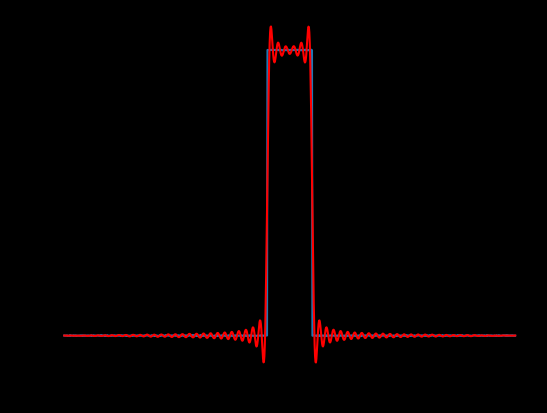

In [577]:
# Aproximando la serie de Fourier 
 
def coeficiente_n(x, t, dt, Tp, n):
    return np.trapz(x*np.exp(-1j*2*np.pi*n*t/Tp),dx=dt)*1/Tp

def coeficientes(x, t, dt, Tp, N):
    return [coeficiente_n(x, t, dt, Tp, i) for i in range(-N,N)]

def aprox_fourier(x, t, dt, Tp, N):
    _c=coeficientes(x, t, dt, Tp, N)
    out=np.zeros(len(x),dtype='complex')
    for k in range(-N,N):
        out += _c[N+k]*np.exp(1j*2*np.pi*(k)*t/Tp)
    return out

Tp = 2 # Ancho del pulso 
w = 0.05 # Ancho del pulso
N_terminos=64
N = 1024

t = np.linspace(-Tp/2, Tp/2, N)
dt = Tp/N

pulso = np.zeros(N)
pulso[abs(t) <= w*Tp] = 1
ruido=0.002*(np.random.rand(N)-0.5)
pulso_y_ruido = pulso + ruido 

aprox_serie_fourier = aprox_fourier(pulso_y_ruido, t, dt, Tp,N_terminos )
plt.plot(t, pulso_y_ruido)
plt.plot(t, aprox_serie_fourier.real, 'r')
plt.show()

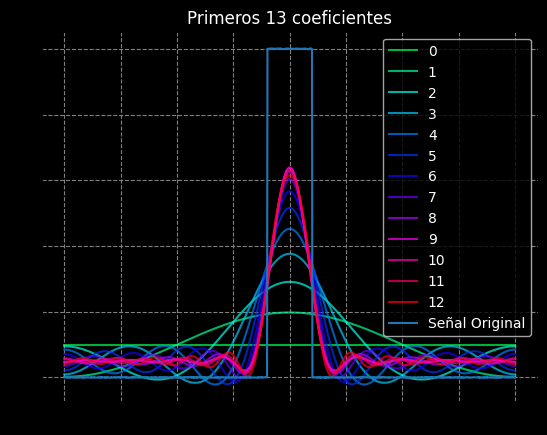

In [600]:
x=t
y=pulso_y_ruido

N = len(y)
COMPONENTS = [13]
for c in COMPONENTS:
    colors = np.linspace(start=100, stop=255, num=c)
    for k in range(c):
        Y = np.fft.fft(y)
        np.put(Y, range(k+1, N), 0.0)
        ifft = np.fft.ifft(Y)
        plt.plot(x, ifft, color=plt.cm.hsv(int(colors[k])), alpha=.70,label=str(k))

    plt.title("Primeros {c} coeficientes".format(c=c))
    plt.plot(x,y, label="Señal Original")
    plt.grid(linestyle='dashed')
    plt.legend()
    plt.show()

In [297]:
c_n, n, omega_0, T, t = symbols('c_n n omega_0 T t', complex=True)
f = symbols('f', cls=Function)
integral_expr = f(t) * exp(-I * n * omega_0 * t)
integral_definida =  integrate(integral_expr, (t, -T/2, T/2))
integral_indefinida =  Integral(integral_expr,t)

integral_indefinida

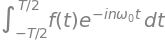

In [549]:
integral_definida

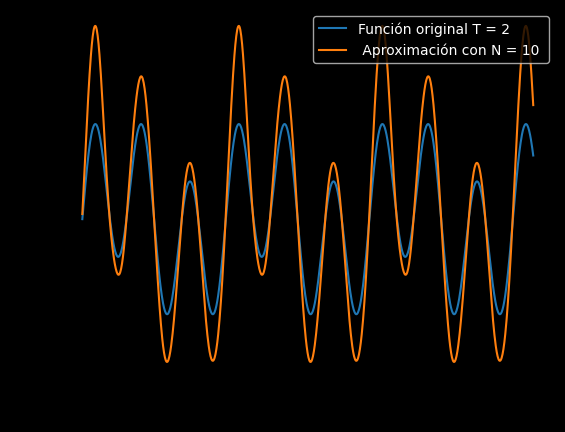

In [335]:
# Definir la función periódica
def f(t):
    return np.sin(3 * np.pi * t) + 0.5 * np.sin(1 * np.pi * t)

# Parámetros
T =2 # Período
omega_0 = 2 * np.pi / T

# Valores de tiempo
t = np.linspace(0,  2 * np.pi, 1000)

# Calcular la serie de Fourier Compleja
N =10 # Número de términos en la serie
approximation = np.zeros(t.size,dtype="complex")
for n in range(-N, N + 1):
    c_n =0.5 *np.trapz(f(t) * np.exp(-1j * n * omega_0 * t), t) / T
    approximation += c_n * np.exp(1j * n * omega_0 * t)

# Graficar la función original y la aproximación
plt.plot(t, f(t), label=f'Función original T = {T}')
plt.plot(t, approximation.real, label=f' Aproximación con N = {N} ')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()
plt.show()


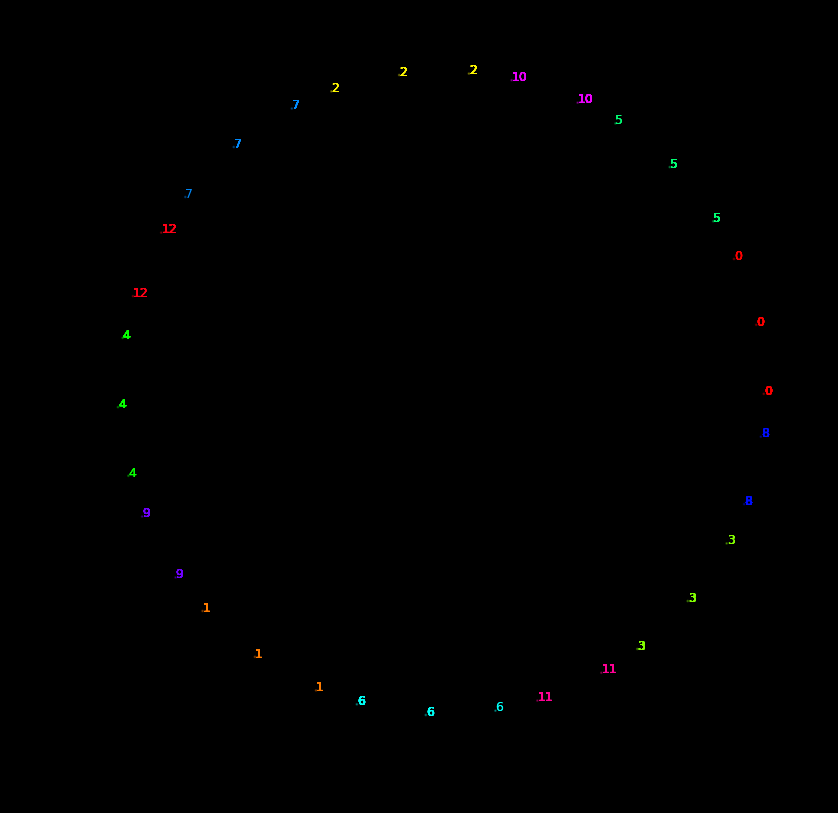

In [601]:
T_o=0.5*(1+np.sqrt(5))
batch=13*3-5
mod_T_o_clk  =   cf.compass(r=1,T=T_o,s=np.arange(batch))
w_o=(2*np.pi)/T_o
atlas_in=mod_T_o_clk
n=np.arange(batch)
symbol_in=n%13

cf.get_atlas_video_text(
    atlas_in=atlas_in,
    symbol=symbol_in,
    fps=1,
    colormap=plt.cm.hsv,
    output_path='./media/videos/PERIODO_PHI.mp4',
    variable_size=0,
    fixed_size=1,
    padding=0.2,
    sx=10,
    sy=10,
    text_size=9,
    alpha=0.54
)